In [18]:
#Task 4 - comparing residue acids 
#comparing GLY,PRO to general clusters, visualizing where GLY,PRO residues lay in the total set
#scatterplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#importing the phi psi combinations csv file
df = pd.read_csv('data_all.csv')

#creating data set for GLY, PRO
is_GLY = df['residue name'] == 'GLY'
is_PRO = df['residue name'] == 'PRO'

df_GLY = df[is_GLY]
df_PRO =df[is_PRO]

#extracting relevant columns
phi_psi = df.iloc[: , 3:5].values.reshape(-1,2)

phi_psi_GLY = df_GLY.iloc[: , 3:5].values.reshape(-1,2)
phi_psi_PRO = df_PRO.iloc[: , 3:5].values.reshape(-1,2)

#translating all angles to its' positive equivalency by using mod func.
phi_psi_pos = phi_psi%360
phi_psi_GLY_pos = phi_psi_GLY%360
phi_psi_PRO_pos = phi_psi_PRO%360

# creating coordinates for general graph
xValues = (phi_psi_pos[:,0])
yValues = (phi_psi_pos[:,1])


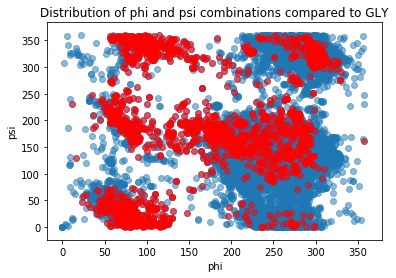

In [19]:
#creating coordinates for GLY and plotting
xValues_GLY = (phi_psi_GLY_pos[:,0])
yValues_GLY = (phi_psi_GLY_pos[:,1])

# plotting
plt.scatter(xValues, yValues, alpha = 0.5)
plt.scatter(xValues_GLY, yValues_GLY, alpha = 0.5, color='r')
plt.title('Distribution of phi and psi combinations compared to GLY')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

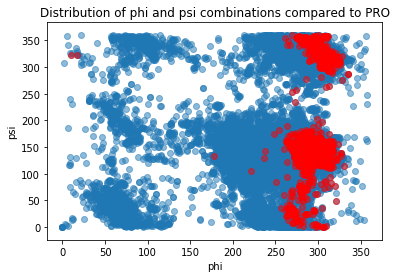

In [20]:
#creating coordinates for PRO and plotting
xValues_PRO = (phi_psi_PRO_pos[:,0])
yValues_PRO = (phi_psi_PRO_pos[:,1])

# plotting
plt.scatter(xValues, yValues, alpha = 0.5)
plt.scatter(xValues_PRO, yValues_PRO, alpha = 0.5, color='r')
plt.title('Distribution of phi and psi combinations compared to PRO')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show()

In [21]:
#func calculating optimal k-value with the silhouette method
def calc_silhouette(data,kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        labels = kmeans.labels_
        sil.append(silhouette_score(data, labels, metric = 'euclidean'))
    
    return sil.index(max(sil))+2, max(sil)

In [22]:
# function returns WSS score for k values from 1 to kmax
def calc_WSS(data,kmax):
    sse = []
    k_values = list(range(1,kmax+1))
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(data)
        curr_sse = 0
    
    #calculate square of Euclidean distance of each point from its cluster center and add to current WSS
        for i in range(len(data)):
            curr_center = centroids[pred_clusters[i]]
            curr_sse += (data[i, 0] - curr_center[0]) ** 2 + (data[i, 1] - curr_center[1]) ** 2
            
        sse.append(curr_sse)
    return sse, k_values

In [23]:
# calculating the optimal k-value with the silhouette method 
res_GLY = calc_silhouette(phi_psi_GLY_pos, 10)
k_value_GLY = res_GLY[0]
sil_GLY = res_GLY[1]

print(f'According to the silhouette method,\nthe optimal number of clusters for GLY are: {k_value_GLY}')

According to the silhouette method,
the optimal number of clusters for GLY are: 5


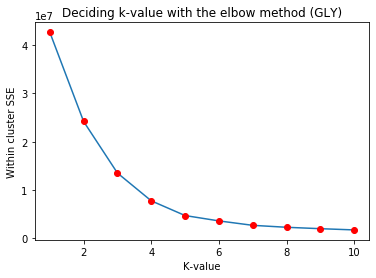

In [24]:
# deciding number of clusters for GLY trhough identifying 'elbow'
y,x = calc_WSS(phi_psi_GLY_pos, 10)

#plotting to identify elbow
plt.plot(x,y)
plt.plot(x,y, 'ro')
plt.xlabel('K-value')
plt.ylabel('Within cluster SSE')
plt.title('Deciding k-value with the elbow method (GLY)')
plt.show()

In [25]:
# calculating the optimal k-value with the silhouette method 
res_PRO = calc_silhouette(phi_psi_PRO_pos, 10)
k_value_PRO = res_PRO[0]
sil_PRO = res_PRO[1]

print(f'According to the silhouette method,\nthe optimal number of clusters for PRO are: {k_value_PRO}')

According to the silhouette method,
the optimal number of clusters for PRO are: 2


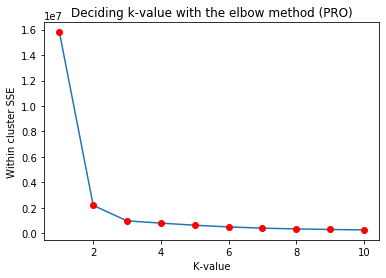

In [26]:
# deciding number of clusters for PRO trhough identifying 'elbow'
y,x = calc_WSS(phi_psi_PRO_pos, 10)

#plotting to identify elbow
plt.plot(x,y)
plt.plot(x,y, 'ro')
plt.xlabel('K-value')
plt.ylabel('Within cluster SSE')
plt.title('Deciding k-value with the elbow method (PRO)')
plt.show()

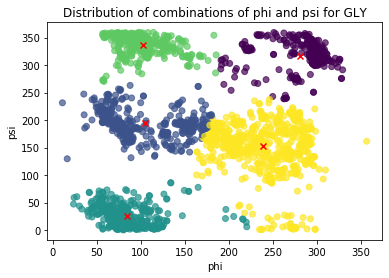

In [36]:
#kmeans for GLY
kmeans = KMeans(n_clusters=k_value_GLY, random_state=0).fit(phi_psi_GLY_pos)

#plotting
plt.scatter(phi_psi_GLY_pos[:,0], phi_psi_GLY_pos[:,1], alpha=0.7, c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi for GLY')
plt.show()


In [28]:
#validating clustering
#silhouette score of K-Means clustering (using k_value from silhouette method)
print(f"The silhouette score for GLY clustering: {sil_GLY}")

The silhouette score for GLY clustering: 0.5922238070852783


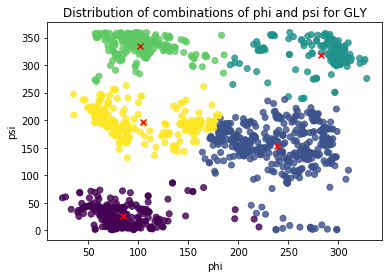

In [29]:
#Validation - stability on subsets
np.random.seed(0)

# removing a random 40% av the data
fraction = 0.4
remove_n = int(fraction * int(len(df_GLY.index)))
drop_indices = np.random.choice(df_GLY.index, remove_n, replace=False)
df_subset_GLY = df_GLY.drop(drop_indices)

# extracting relevant columns and reshaping the periodic data
GLY_pos_subset = df_subset_GLY.iloc[:, 3:5].values.reshape(-1,2)%360

# perform K-Means clustering with same parameters as full sample for comparison
kmeans = KMeans(n_clusters=k_value_GLY, random_state=0).fit(GLY_pos_subset)

# scatter plot with cluster centroids
plt.scatter(GLY_pos_subset[:,0], GLY_pos_subset[:,1], c=kmeans.labels_.astype(float), alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi for GLY')
plt.show()

In [30]:
# calculating silhouette value to compare to total data set
res_GLY_sub = calc_silhouette(GLY_pos_subset, 7)
sil_GLY_sub = res_GLY_sub[1]

print(f"The silhouette score is: {sil_GLY_sub},\n compared to {sil_GLY} for the total GLY sample")

The silhouette score is: 0.6037885382507691,
 compared to 0.5922238070852783 for the total GLY sample


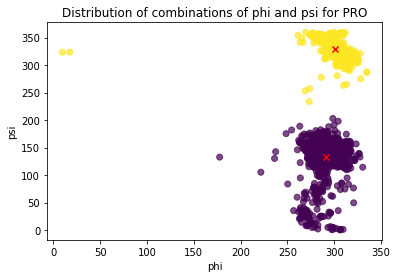

In [37]:
#kmeans for PRO
kmeans = KMeans(n_clusters=k_value_PRO, random_state=0).fit(phi_psi_PRO_pos)

#plotting
plt.scatter(phi_psi_PRO_pos[:,0], phi_psi_PRO_pos[:,1], alpha=0.7, c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi for PRO')
plt.show()


In [32]:
#validating clustering 
#silhouette score of K-Means clustering (using k_value from silhouette method)
print(f"The silhouette score for PRO clustering: {sil_PRO}")

The silhouette score for PRO clustering: 0.8094753700515811


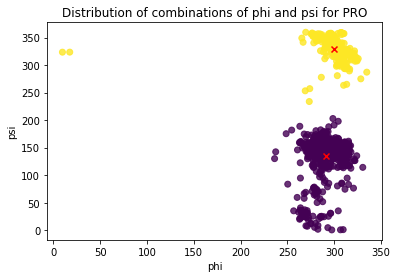

In [33]:
#Validation - stability on subsets
np.random.seed(0)

# removing a random 40% av the data
fraction = 0.4
remove_n = int(fraction * int(len(df_PRO.index)))
drop_indices = np.random.choice(df_PRO.index, remove_n, replace=False)
df_subset_PRO = df_PRO.drop(drop_indices)

# extracting relevant columns and reshaping the periodic data
PRO_pos_subset = df_subset_PRO.iloc[:, 3:5].values.reshape(-1,2)%360

# perform K-Means clustering with same parameters as full sample for comparison
kmeans = KMeans(n_clusters=k_value_PRO, random_state=0).fit(PRO_pos_subset)

# scatter plot with cluster centroids
plt.scatter(PRO_pos_subset[:,0], PRO_pos_subset[:,1], c=kmeans.labels_.astype(float), alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='x')
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('Distribution of combinations of phi and psi for PRO')
plt.show()

In [34]:
# calculating silhouette value to compare to total data set
res_PRO_sub = calc_silhouette(PRO_pos_subset, 7)
sil_PRO_sub = res_PRO_sub[1]

print(f"The silhouette score is: {sil_PRO_sub},\n compared to {sil_PRO} for the total PRO sample")

The silhouette score is: 0.8063967581117706,
 compared to 0.8094753700515811 for the total PRO sample
